In [3]:
import pandas_datareader as pdr
key="7c6f1a4177376c127885e6e953e985d05d975a4a"

<a name="dataset"></a>
### Import dataset

In [7]:
df1=pd.read_csv('data.csv')


<a name="cname"></a>
### Rename columns

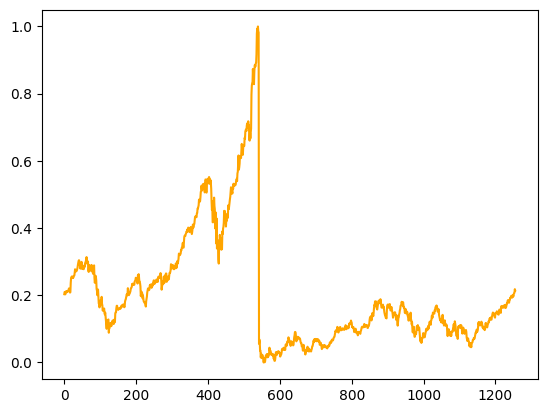

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1,color='orange')


<a name="dateformat"></a>

### Convert date from string to date format

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.20320601],
       [0.20974327],
       [0.20916719],
       ...,
       [0.20726362],
       [0.21823419],
       [0.2144521 ]])

In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [11]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 11s 358ms/step - loss: 0.0544 - val_loss: 0.0040
Epoch 2/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0194 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0133 - val_loss: 9.3910e-04
Epoch 4/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0117 - val_loss: 0.0012
Epoch 5/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0096 - val_loss: 3.7753e-04
Epoch 6/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0085 - val_loss: 3.7897e-04
Epoch 7/100
12/12 [==============================] - 3s 264ms/step - loss: 0.0077 - val_loss: 3.2972e-04
Epoch 8/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0072 - val_loss: 7.4566e-04
Epoch 9/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0061 - val_loss: 3.5619e-04
Epoch 10/100
12/12 [==============================] - 4s 309ms/ste

<a name="sortdate"></a>

### Sorting dataset by date format

11/11 [==============================] - 1s 48ms/step


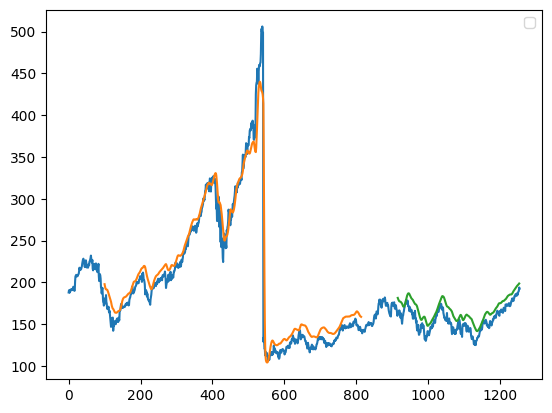

In [21]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(ytest,test_predict))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()
